In [1]:
import preliz as pz
from matplotlib import pyplot as plt

In [2]:
%matplotlib widget

interactive(children=(FloatSlider(value=1.0, description='alpha (0, inf)', max=11.0, min=2.220446049250313e-16…

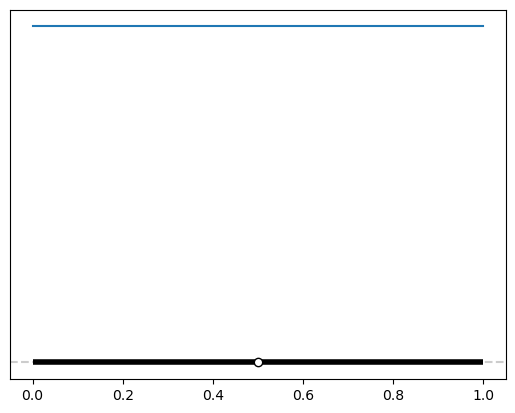

In [3]:
plt.gcf().clear()
pz.Beta(1,1).plot_interactive(kind='pdf',xy_lim='auto',interval='hdi',)
#plt.show()

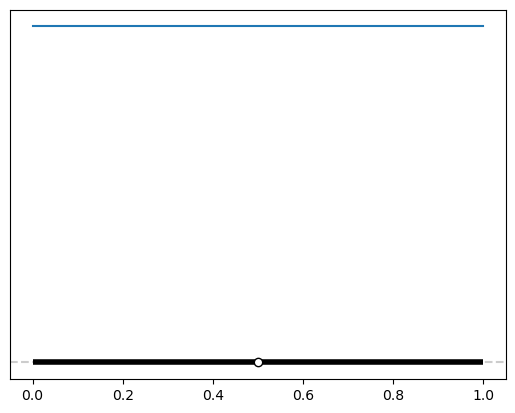

In [4]:
plt.show()

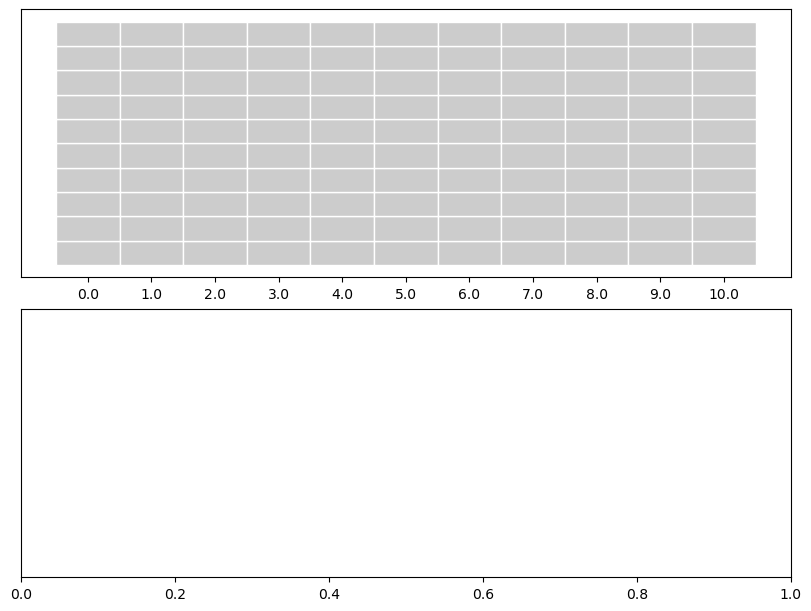

In [5]:
pz.roulette()

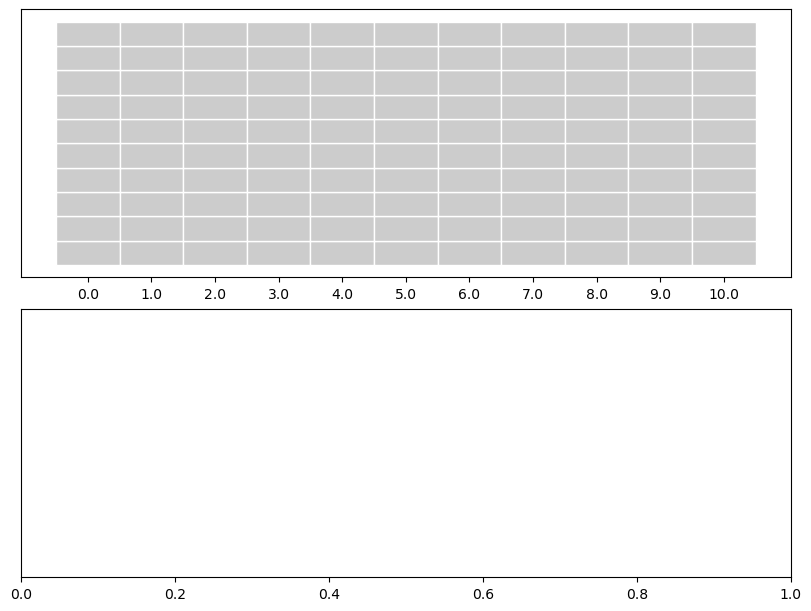

Beta(mean=0.6, median=0.6, std=0.08, lower=0.45, upper=0.74)

In [6]:
prob_frown=pz.Beta(alpha=24, beta=16)
plt.show()
prob_frown.summary()

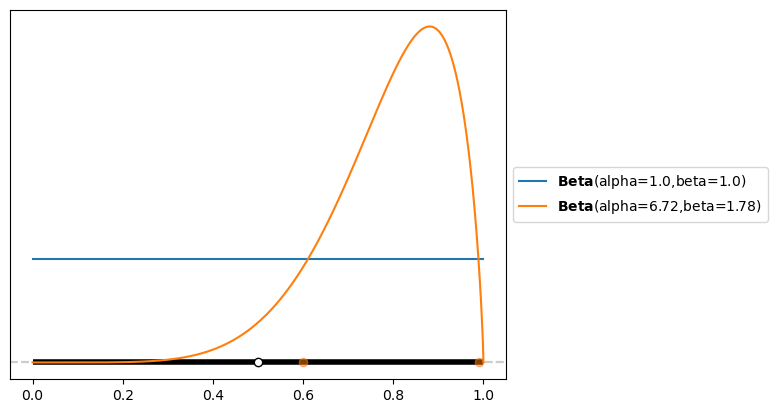

Beta(alpha=6.72,beta=1.78)

In [7]:
plt.close()
prob_smile= pz.Beta()
pz.maxent(prob_smile, lower=.60, upper=.99, mass=.90,);
plt.show()
prob_smile



In [8]:
import numpy as np
import pandas as pd
import pymc as pm
import xarray as xr
import blackjax


No such comm: b802244bcc564be0b4c76468312758e2


No such comm: fd99dfc37e4c46eea30d971e2d9f9ab9


No such comm: 881cae23115e4724b2e11b209f8a70bb


No such comm: f3814502e00c488995d4b96ad7cd9df0


In [9]:
import lux

In [10]:

smiles = pm.BetaBinomial.dist(alpha=prob_smile.alpha,beta=prob_smile.beta, n=10, shape=100)
print(smiles.eval())
frowns = pm.BetaBinomial.dist(alpha=prob_frown.alpha, beta=prob_frown.beta, n=10-smiles, shape=100)
print(frowns.eval())

print((smiles+frowns).eval())

[ 8  9 10  9  8  8  9  9  7 10 10 10  8  7 10  7  9  7 10  8 10  7  4  8
  7  8  8  8  7  8  6  9  4  9  8  7  7  8 10  8  5 10  9  9  8  8 10  9
  8  7  6  8  9  4  9  8  5  5  9  9  8  9  5  9  3  9 10  9  9 10  9  5
  5  9  8  8  8  8  9  9  5  7  9  6  7  7 10  6  6  7  8 10  9  6 10  7
  6 10  3  6]
[2 1 0 1 1 2 0 1 3 0 0 0 2 1 0 1 1 3 0 1 0 2 4 0 0 2 2 2 2 1 1 0 5 1 0 3 3
 1 0 1 4 0 1 1 2 2 0 0 1 2 3 1 1 5 0 2 5 3 0 0 1 1 3 1 2 1 0 1 1 0 1 3 4 0
 1 1 1 1 1 0 4 1 1 3 3 2 0 3 3 0 2 0 1 4 0 1 1 0 5 4]
[10 10 10 10  9 10  9 10 10 10 10 10 10  8 10  8 10 10 10  9 10  9  8  8
  7 10 10 10  9  9  7  9  9 10  8 10 10  9 10  9  9 10 10 10 10 10 10  9
  9  9  9  9 10  9  9 10 10  8  9  9  9 10  8 10  5 10 10 10 10 10 10  8
  9  9  9  9  9  9 10  9  9  8 10  9 10  9 10  9  9  7 10 10 10 10 10  8
  7 10  8 10]


In [11]:



# FILEPATH: /home/wmbelk74/repositories/wmbelk-git/preliz_try.ipynb
datetime = pd.to_datetime((np.arange(0, 100) * 10) + 222, unit='s')  # Convert seconds to datetime

lat_seed = np.linspace(-90, 90, 1)  # example latitude values
lon_seed = np.linspace(-180, 180, 1)  # example longitude values
altitude_seed = np.linspace(0, 1000, 1)  # example altitude values
coord_stack=[lat_seed,lon_seed,altitude_seed]
# Generate random differences between each successive data point
differences = np.random.rand(100,3)

# Calculate the cumulative sum of the differences to get the final values
coord_add_values = np.cumsum(differences, axis=0)
coord_stack+=coord_add_values.T
(lat,lon,altitude)=coord_stack

butterfly_flight = xr.DataArray(
    np.array([smiles.eval(),frowns.eval()]),  # example random data with differences
    dims=['expression', "time", ],
    coords={'expression': ["smiles","frowns"],"time": datetime, "lat": ('time', lat), "lon": ('time',lon), "altitude": ('time',altitude)},
)
butterfly_flight

<xarray.DataArray (expression: 2, time: 100)>
array([[ 8,  9, 10,  9,  8,  8,  9,  9,  7, 10, 10, 10,  8,  7, 10,  7,
         9,  7, 10,  8, 10,  7,  4,  8,  7,  8,  8,  8,  7,  8,  6,  9,
         4,  9,  8,  7,  7,  8, 10,  8,  5, 10,  9,  9,  8,  8, 10,  9,
         8,  7,  6,  8,  9,  4,  9,  8,  5,  5,  9,  9,  8,  9,  5,  9,
         3,  9, 10,  9,  9, 10,  9,  5,  5,  9,  8,  8,  8,  8,  9,  9,
         5,  7,  9,  6,  7,  7, 10,  6,  6,  7,  8, 10,  9,  6, 10,  7,
         6, 10,  3,  6],
       [ 2,  1,  0,  1,  1,  2,  0,  1,  3,  0,  0,  0,  2,  1,  0,  1,
         1,  3,  0,  1,  0,  2,  4,  0,  0,  2,  2,  2,  2,  1,  1,  0,
         5,  1,  0,  3,  3,  1,  0,  1,  4,  0,  1,  1,  2,  2,  0,  0,
         1,  2,  3,  1,  1,  5,  0,  2,  5,  3,  0,  0,  1,  1,  3,  1,
         2,  1,  0,  1,  1,  0,  1,  3,  4,  0,  1,  1,  1,  1,  1,  0,
         4,  1,  1,  3,  3,  2,  0,  3,  3,  0,  2,  0,  1,  4,  0,  1,
         1,  0,  5,  4]])
Coordinates:
  * expression  (expression) <U6 'smiles' 'frowns'
  * time        (time) datetime64[ns] 1970-01-01T00:03:42 ... 1970-01-01T00:2...
    lat         (time) float64 -89.31 -89.11 -88.46 ... -41.73 -40.83 -40.76
    lon         (time) float64 -179.4 -179.2 -178.6 ... -132.1 -131.4 -131.1
    altitude    (time) float64 0.9026 1.888 2.04 2.594 ... 54.27 54.77 55.38

In [12]:

def convert_coords_to_pymc(dataset):
    return {i:ii.values for (i,ii) in dataset.coords.items() if isinstance(ii, xr.DataArray)}

# Example usage:
pymc_coords = convert_coords_to_pymc(butterfly_flight)



In [13]:
with pm.Model(coords=convert_coords_to_pymc(butterfly_flight)) as dim_import_test:
    data_smiles = pm.Data('smiles_obs',butterfly_flight['expression'=='smiles'],mutable=True,infer_dims_and_coords=True, dims='time')
    data_frowns = pm.Data('frowns_obs',butterfly_flight['expression'=='frowns'],mutable=True,infer_dims_and_coords=True, dims='time')
    smile_alpha = pm.HalfCauchy('smile_alpha', beta=prob_smile.alpha)
    smile_beta = pm.HalfCauchy('smile_beta', beta=prob_smile.beta)
    frown_alpha = pm.HalfCauchy('frown_alpha', beta=prob_frown.alpha)
    frown_beta = pm.HalfCauchy('frown_beta', beta=prob_frown.beta)


    smiles = pm.BetaBinomial('smiles', alpha=smile_alpha, beta=smile_beta, n=10, observed=data_smiles, dims='time')
    frowns = pm.BetaBinomial('frowns', alpha=frown_alpha, beta=frown_beta, n=10, observed=data_frowns, dims='time')

    trace = pm.sample(1000, tune=1000, cores=1, chains=1, return_inferencedata=True,nuts_sampler='blackjax')

    


Compiling...
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
/home/wmbelk74/anaconda3/envs/Pymc_py311/lib/python3.11/site-packages/pymc/sampling/jax.py:454: UserWarning: BlackJax currently only display progress bar correctly under `chain_method == 'vectorized'`. Setting `progressbar=False`.
  warnings.warn(
Compilation time = 0:00:01.171506
Sampling...
Sampling time = 0:00:06.274041
Transforming variables...
Transformation time = 0:00:00.087830


In [14]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data

In [15]:
butterfly_flight.to_dataframe(name='smiles'
                                                ).reset_index()


/home/wmbelk74/anaconda3/envs/Pymc_py311/lib/python3.11/site-packages/lux/executor/PandasExecutor.py:555: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/home/wmbelk74/anaconda3/envs/Pymc_py311/lib/python3.11/site-packages/lux/executor/PandasExecutor.py:574: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [16]:
import math

def degrees_to_radians(degrees):
    radians = math.radians(degrees)
    return radians


In [33]:
#alternative bee flight profile creation using pymc model as generative model

time_line = pd.to_datetime((np.arange(0, 100) * 10) + 222, unit='s')  # Convert seconds to datetime
with pm.Model(coords={'time':time_line}) as flight_gen:
    #create constant data variables for lat, lon, altitude
    Lat_start = pm.Data('Lat_start',degrees_to_radians(-45),mutable=False)
    Lon_start = pm.Data('Lon_start',degrees_to_radians(45),mutable=False)
    Alt_start = pm.Data('Alt_start',1000,mutable=False)
    #use pymc to create a gaussian walk values for lat, lon, altitude
    Lat = pm.GaussianRandomWalk('Lat',mu=Lat_start, sigma=1, init_dist = pm.Normal.dist(0,.7), dims=['time'])
    Lon = pm.GaussianRandomWalk('Lon',mu=Lon_start, sigma=1, init_dist = pm.Normal.dist(0,.7), dims=['time'])
    Alt = pm.GaussianRandomWalk('Alt',mu=Alt_start, sigma=1, init_dist = pm.Normal.dist(0,550), dims=['time'])
    idata = pm.sample_prior_predictive(1, random_seed=42)
    




Sampling: [Alt, Lat, Lon]


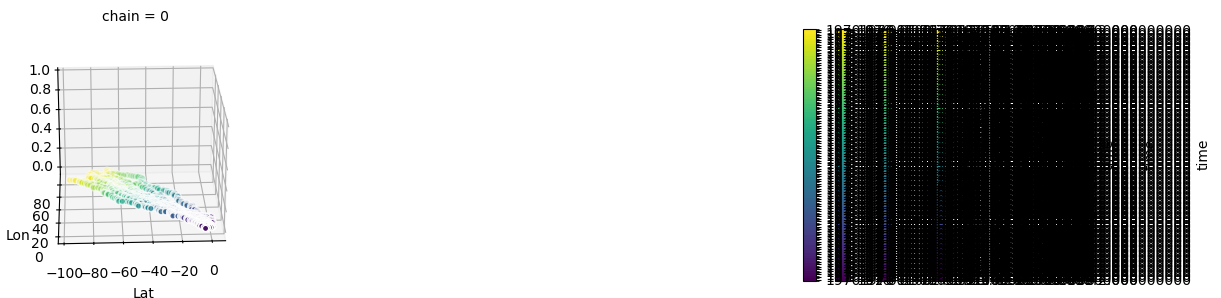

In [34]:
idata.prior.plot.scatter(x='Lat',y='Lon',z='Alt',hue='time')
plt.show()

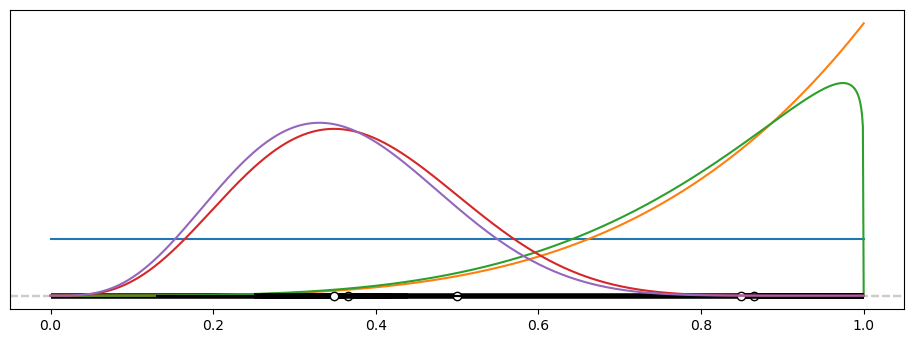

In [ ]:
plt.show()